# Train classic mnist dataset for number recognition

In [17]:
from sklearn.model_selection import train_test_split
from keras.datasets import mnist

import warnings
warnings.filterwarnings('ignore')

In [2]:
from matplotlib import pyplot as plt

## Load the mnist data

In [3]:
(X_train,y_train),(X_test, y_test) = mnist.load_data()

In [4]:
print(type(X_train), X_train.shape)

<class 'numpy.ndarray'> (60000, 28, 28)


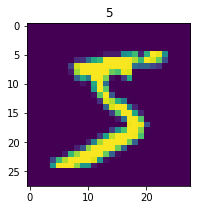

In [5]:
# check one example
img1=X_train[0]
fig1 = plt.figure(figsize=(3,3))
plt.imshow(img1)
plt.title(y_train[0])
plt.show()

## Format the input data

In [6]:
feature_size = img1.shape[0]*img1.shape[1]
X_train_format = X_train.reshape(X_train.shape[0],
                                 feature_size)
X_test_format = X_test.reshape(X_test.shape[0],
                                 feature_size)

In [7]:
X_train_format.shape

(60000, 784)

### Normalize the input data

In [8]:
X_train_normal = X_train_format/255
X_test_normal = X_test_format/255

In [9]:
from keras.utils import to_categorical
y_train_format = to_categorical(y_train)
y_test_format = to_categorical(y_test)
print(y_train[0])
print(y_train_format[0])

5
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


## Set up the model 

In [10]:
from keras.models import Sequential
from keras.layers import Dense, Activation

mlp = Sequential()
mlp.add(Dense(units=392, activation='sigmoid',
             input_dim=feature_size))
mlp.add(Dense(units=392, activation='sigmoid'))
mlp.add(Dense(units=10,activation='softmax'))
mlp.summary()




Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 392)               307720    
_________________________________________________________________
dense_2 (Dense)              (None, 392)               154056    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                3930      
Total params: 465,706
Trainable params: 465,706
Non-trainable params: 0
_________________________________________________________________


## Configure the model 

In [11]:
mlp.compile(loss='categorical_crossentropy',
           optimizer='adam')

## Train the model

In [12]:
mlp.fit(X_train_normal,y_train_format,epochs=10)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Epoch 1/10
60000/60000 [==============================] - 9s 146us/step - loss: 0.3457
Epoch 2/10
60000/60000 [==============================] - 8s 136us/step - loss: 0.1457
Epoch 3/10
60000/60000 [==============================] - 9s 153us/step - loss: 0.0940
Epoch 4/10
60000/60000 [==============================] - 8s 140us/step - loss: 0.0660
Epoch 5/10
60000/60000 [==============================] - 9s 144us/step - loss: 0.0490
Epoch 6/10
60000/60000 [==============================] - 8s 141us/step - loss: 0.0371
Epoch 7/10
60000/60000 [==============================] - 9s 142us/step - loss: 0.0279
Epoch 8/10
60000/60000 [==============================] - 9s 143us/step - loss: 0.0211
Epoch 9/10
60000/60000 [==============================] - 9s 143us/step - loss: 0.0163
Epoch 10/10
60000/60000 [==============================] - 9s 145us/step - loss: 0.0141


## Evaluate the model 

In [13]:
y_train_predict = mlp.predict_classes(X_train_normal)
print(y_train_predict)

[5 0 4 ... 5 6 8]


In [14]:
from sklearn.metrics import accuracy_score
accuracy_train = accuracy_score(y_train, y_train_predict)
print(accuracy_train)

0.99745


In [15]:
y_test_predict = mlp.predict_classes(X_test_normal)
accuracy_test = accuracy_score(y_test, y_test_predict)
print(accuracy_test)

0.9824


## Test specific cases

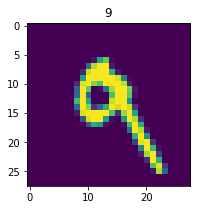

In [16]:
img2=X_test[7]
fig1 = plt.figure(figsize=(3,3))
plt.imshow(img2)
plt.title(y_test_predict[7])
plt.show()

## Save the trained model to a local file.

In [ ]:
mlp.save('my_model.h5') 